## Uppgift 3.13

Här ska vi udersöka om det finns en signifikan skillnad på värdena uppmätta av två experimetella tekniker över 6 mätningar
<img src="img/exe3.13.png">


In [2]:
import pandas as pd
import numpy as np

stickprov = [[22.2,19.2,15.7,20.4,19.6,15.7],\
            [25.0,19.5,16.6,21.3,20.7,16.8]]

data = pd.DataFrame(np.transpose(stickprov),columns=["New","Standard"],index=range(1,7))
data

,New,Standard
1,22.2,25.0
2,19.2,19.5
3,15.7,16.6
4,20.4,21.3
5,19.6,20.7
6,15.7,16.8


Eftersom data är parat kan vi använda ett parat t-test, dvs vi undersöker skillnaden mellan mätningarna istället för skillnaden i genomsnitt mellan mätningarna.

In [3]:
diff = data["New"]-data["Standard"]
tv = diff.mean()*np.sqrt(diff.count())/diff.std()
tv

-3.431112967833953

Detta kan jämföras med ett kritiskt $t$ på en tvåsidig 5%-nivå (= ensidig 2.5%-nivå) med 5 frihetsgrader, $t^{0.975}_{5}$. Samma värde kan även hittas i tabell A.2.

In [4]:
from scipy.stats import t
t.ppf(1-0.05/2,diff.count()-1)

2.5705818366147395

In [5]:
p=2*t.sf(abs(tv),diff.count()-1)
p

0.018613150135273315

Vi kan förkasta hypotesen att metoderna inte skiljer sig åt. Dvs, vi ser att teknikerna skiljer sig signifikant åt.

([<matplotlib.axis.XTick at 0x1a1b1ae590>,
 <a list of 2 Text xticklabel objects>)

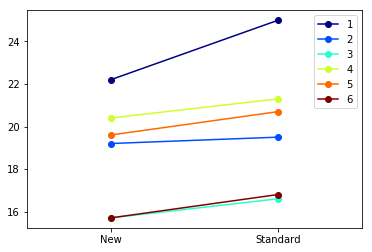

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = data.T.plot(colormap='jet', style = '-o', xlim = (-.5,1.5))
plt.xticks([0,1], list(data))